## 오차 역전파법  
MNIST 숫자 데이터를 인식하고 검증하는 코드를 구현해 보자

In [ ]:
import os, sys
print(os.getcwd())
current_dir = os.path.dirname(os.getcwd())
print(current_dir)
os.chdir(current_dir)

import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from ch04.two_layer_net import TwoLayerNet

0 train acc, test acc | 0.0993, 0.1033
600 train acc, test acc | 0.9542166666666667, 0.9511
1200 train acc, test acc | 0.9713833333333334, 0.9649
1800 train acc, test acc | 0.9801333333333333, 0.9729
2400 train acc, test acc | 0.98275, 0.9724
3000 train acc, test acc | 0.9836333333333334, 0.9733
3600 train acc, test acc | 0.98895, 0.9777
4200 train acc, test acc | 0.9911, 0.9769
4800 train acc, test acc | 0.99175, 0.9785
5400 train acc, test acc | 0.9938833333333333, 0.9794
6000 train acc, test acc | 0.9949166666666667, 0.9793
6600 train acc, test acc | 0.9959333333333333, 0.9772
7200 train acc, test acc | 0.9970333333333333, 0.9789
7800 train acc, test acc | 0.9972, 0.9792
8400 train acc, test acc | 0.9965166666666667, 0.9787
9000 train acc, test acc | 0.9974666666666666, 0.98
9600 train acc, test acc | 0.99895, 0.98
10200 train acc, test acc | 0.9989, 0.9797
10800 train acc, test acc | 0.9994666666666666, 0.98
11400 train acc, test acc | 0.9996166666666667, 0.9803
12000 train acc, te

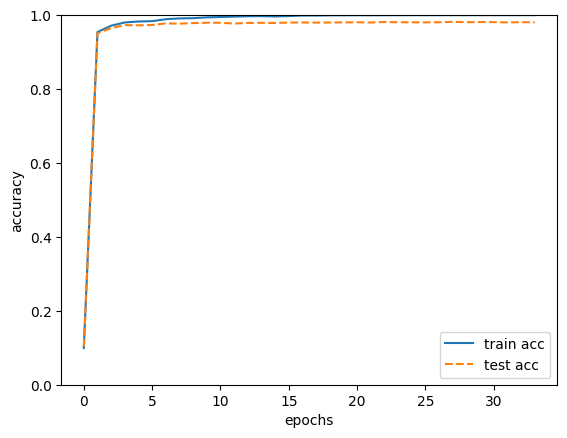

In [2]:
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)
hidden_size = 150
network = TwoLayerNet(input_size=784, hidden_size=hidden_size, output_size=10)

iters_num = 20000
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.5

train_loss_list = []
train_acc_list = []
test_acc_list = []

iter_per_epoch = max(train_size / batch_size, 1)

for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]

    grad = network.gradient(x_batch, t_batch)

    for key in ('W1', 'b1', 'W2', 'b2'):
        network.params[key] -= learning_rate * grad[key]

    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss)

    if i%iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
        print(i, "train acc, test acc | " + str(train_acc) + ", " + str(test_acc))


print("hidden_size:",hidden_size)
print("iters_num:",iters_num)
print("learning_rate:",learning_rate)

markers = {'train': 'o', 'test': 's'}
x = np.arange(len(train_acc_list))

plt.plot(x, train_acc_list, label='train acc')
plt.plot(x, test_acc_list, label='test acc', linestyle='--')
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()